# Getting familiar with torch.autograd

Neural networks (NNs) are a collection of nested functions that are executed on some input data. These functions are defined by parameters (consisting of weights and biases), which in PyTorch are stored in tensors.

Training a NN happens in two steps:

- Forward Propagation: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.

- Backward Propagation: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent. 

In [2]:
import torch
import numpy as np

### Vector to scalar

In [3]:
# define the x vector
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [4]:
# define the y = f(x) function returning a scalar
y = 2 * torch.dot(x, x)
y


tensor(28.)

In [5]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
print(x.grad)  # The gradient is None by default

None


In [6]:
y.backward()
x.grad

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

### Vector to vector

Because y is a vector, we must pass a gradient argument to backward(). 

We pass $v^ᵀ$ with the same length as y and has values 1.

In [ ]:
x = torch.tensor([1., 2.], requires_grad=True)
print('x:', x)

y = 3 * x**2
print('y:', y)

gradient_value = [1., 1.] # here is to show how to use the gradient argument in the backward function
# it is not necessary to use this argument, but it can be useful in some cases, to scale the gradients (see example below)

y.backward(torch.tensor(gradient_value)) 
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad: tensor([ 6., 12.])


In [ ]:
x = torch.tensor([1., 2.], requires_grad=True)
print('x:', x)

y = 3 * x**2
print('y:', y)

gradient_value = [1., 10.] # here is to show how to use the gradient argument
y.backward(torch.tensor(gradient_value)) 
print('x.grad:', x.grad)


x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad: tensor([  6., 120.])


One benefit of using automatic differentiation is that even if building the computational graph of a function required passing through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls), we can still calculate the gradient of the resulting variable.

In [ ]:
def f(a): 
    b = a * 2
    while b.norm() < 1000: 
        b = b * 2
    if b.sum() > 0: 
        c = b
    else:
        c = 100 * b
    return c

In [ ]:
a = torch.randn(size=(), requires_grad=True)
print('a:', a)
d = f(a)
d.backward()
print('a.grad:', a.grad)
# check that gradient is f(a)/a as expected dince the function is f(a) = constant * a
a.grad == f(a)/a

## Exercizes

### Ex 1 -- Practice with this topic, you can follow the step-by-step tutorial here
 
[*The Gradient Argument in PyTorch’s `backward()` Function Explained by Examples*](https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29).

### Ex 2 -- Let 𝑓 (𝑥) = sin(𝑥). Plot the graph of 𝑓 and of its derivative 𝑓 ′. Do not exploit the fact that 𝑓 ′ (𝑥) = cos(𝑥) but rather use automatic differentiation to get the result.

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
        2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
        3.6000, 3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000,
        4.5000, 4.6000, 4.7000, 4.8000, 4.9000, 5.0000, 5.1000, 5.2000, 5.3000,
        5.4000, 5.5000, 5.6000, 5.7000, 5.8000, 5.9000, 6.0000, 6.1000, 6.2000])


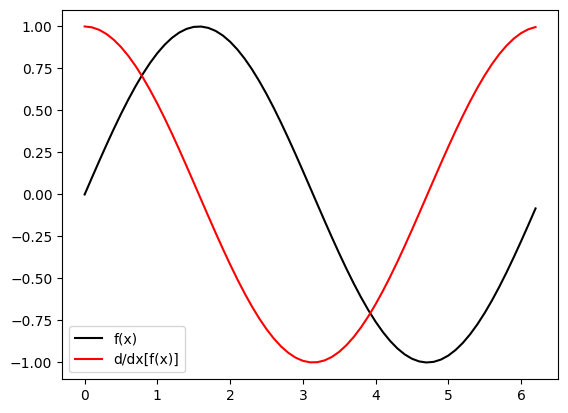

In [21]:
import matplotlib.pyplot as plt

# x = torch.tensor(1.0, requires_grad=True)
x = torch.arange(0,6.28,0.1)
print(x)
x.requires_grad_(True)
x.grad
y = torch.sin(x)
# print(y)
y.backward(gradient=torch.ones(len(y)))
f_x = x.grad
plt.plot(x.detach().numpy(),y.detach().numpy(),"-",color='k',label='f(x)')
plt.plot(x.detach().numpy(),f_x.detach().numpy(),"-",color='r',label="d/dx[f(x)]")
plt.legend()

### Ex 5 -- Let 𝑓 (𝑥) = ((log $x^2$) · sin 𝑥) + $𝑥^{−1}$. 

Write out a dependency graph tracing results from 𝑥 to 𝑓 (𝑥):
We'll identify intermediate steps starting from x and building up to f(x)

- Start from: x

- Intermediate computations:
    - $x^2$ 
        - log($x^2$)
    - sin(x) 
        - log($x^2$) * sin(x)
    - 1/x
        - log($x^2$) * sin(x) + 1/x

Now use the chain rule to comput the analytical derivative of thea function; also comppute the gradient using autigrad and compare the two solutions by plotting them and see if they overlap.